##  **1. Exploración y Preparación de los Datos**

In [1102]:
#importaciòn de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from dotenv import load_dotenv
warnings.filterwarnings('ignore')

VISTA GENERAL DEL DATASET

In [1103]:
# Cargar los datos

load_dotenv()
data = os.getenv('file')

df = pd.read_csv(data)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [1104]:
df.columns


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [1105]:
df.shape

(55500, 15)

**Glosario de las variables**

Nombre:'Name' Esta columna representa el nombre del paciente asociado al registro de atención médica.

Edad: 'Age' La edad del paciente en el momento del ingreso, expresada en años.

Género: 'Gender' Indica el género del paciente, ya sea “Masculino” o “Femenino”.

Tipo de sangre: 'Blood Type' El tipo de sangre del paciente, que puede ser uno de los tipos de sangre comunes (por ejemplo, "A+", "O-", etc.).

Condición médica: 'Medical Condition' esta columna especifica la condición médica principal o el diagnóstico asociado con el paciente, como "Diabetes", "Hipertensión", "Asma" y más.

Fecha de ingreso:'Date of Admission' Fecha en la que el paciente fue admitido en el centro de atención médica.

Médico: 'Doctor' Nombre del médico responsable de la atención del paciente durante su ingreso.

Hospital: 'Hospital' Identifica el centro de salud u hospital donde fue ingresado el paciente.

Proveedor de seguros: 'Insurance Provider' esta columna indica el proveedor de seguros del paciente, que puede ser una de varias opciones, incluidas "Aetna", "Blue Cross", "Cigna", "UnitedHealthcare" y "Medicare".

Monto de facturación: 'Billing Amount' cantidad de dinero facturada por los servicios de atención médica del paciente durante su ingreso. Se expresa como un número de punto flotante.

Número de habitación: 'Room Number' El número de habitación donde fue alojado el paciente durante su ingreso.

Tipo de admisión:  'Admission Type' especifica el tipo de admisión, que puede ser "Emergencia", "Electiva" o "Urgente", reflejando las circunstancias de la admisión.

Fecha de alta: 'Discharge Date' La fecha en la que el paciente fue dado de alta del centro de atención médica, según la fecha de ingreso y un número aleatorio de días dentro de un rango realista.

Medicación: 'Medication' identifica una medicación prescrita o administrada al paciente durante su ingreso. Algunos ejemplos son "aspirina", "ibuprofeno", "penicilina", "paracetamol" y "lipitor".

Resultados de la prueba: 'Test Results'describe los resultados de una prueba médica realizada durante el ingreso del paciente. Los valores posibles incluyen "Normal", "Anormal" o "No concluyente", lo que indica el resultado de la prueba.

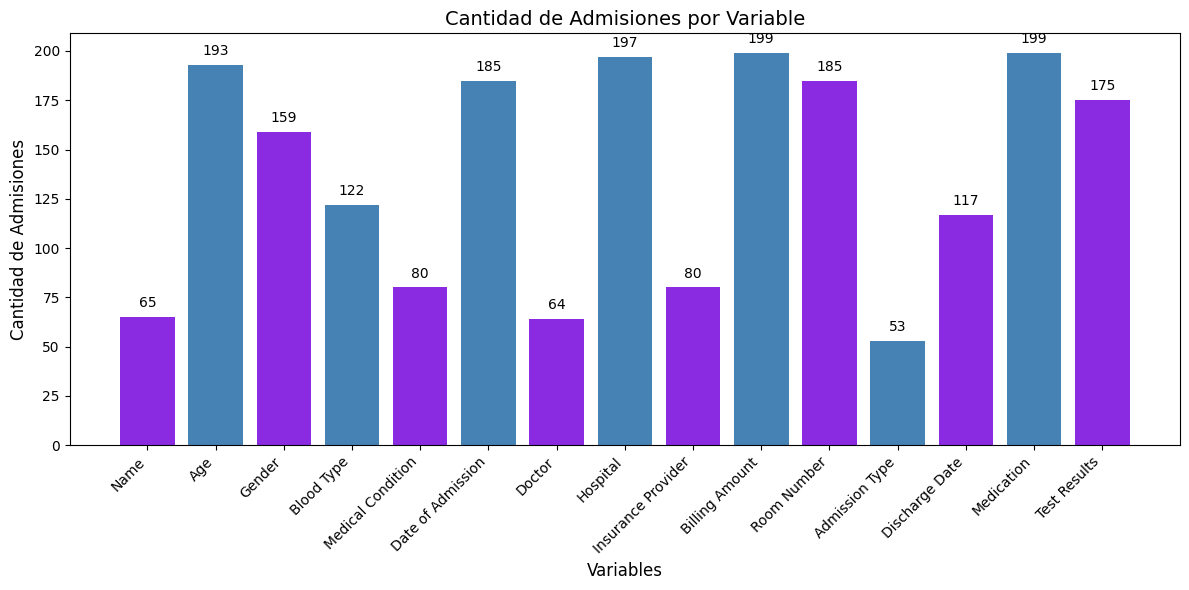

In [1106]:
#primer grafico de distribucion de las variables
# Variables para ilustración
variables = ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
    'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
    'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
    'Medication', 'Test Results'
]

# Cantidad  por variable para el eje Y
admission_counts = np.random.randint(50, 200, len(variables))

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(variables, admission_counts, color=['#8A2BE2' if i % 2 == 0 else '#4682B4' for i in range(len(variables))])

# Mostrar valores en la parte superior de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(height), ha='center', fontsize=10)

# Personalización del gráfico
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("Cantidad de Admisiones por Variable", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Cantidad de Admisiones", fontsize=12)
plt.tight_layout()

# Mostrar gráfico
plt.show()



Este gráfico de barras muestra la cantidad de registros únicos o diferentes en cada variable del dataset.

##  **2.Limpieza de Datos**

In [1107]:
# Obtener la dimensión del dataframe
dimension = df.shape
print("Dimensión del dataframe:", dimension)


Dimensión del dataframe: (55500, 15)


**Buscar valores faltantes, nulos y duplicados**

In [1108]:

null=(lambda df: df.isnull().sum())(df)
duplicated = (lambda df: df.duplicated().sum())(df)
unique_val = df.nunique()
print(f"Valores nulos:\n{null}\n")
print(f"Valores duplicados:\n{duplicated}\n")
print(f"Valores unicos:\n{unique_val}\n")

Valores nulos:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Valores duplicados:
534

Valores unicos:
Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64



In [1109]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

                     Name  Age  Gender Blood Type Medical Condition  \
50023        Samuel joYCe   56    Male         O+         Arthritis   
50040    KIMBErly vasqueZ   26    Male         A-           Obesity   
50055      SCoTT tHOrNton   55  Female         B-           Obesity   
50070         wiLliam LEe   27  Female         O+         Arthritis   
50078  chRistOPheR NoRrIs   38    Male        AB-         Arthritis   
...                   ...  ...     ...        ...               ...   
55461      connOR coMPTon   63    Male         A+            Asthma   
55462       alYSsA mIlLER   35  Female         A-          Diabetes   
55464        ChRIs huGHeS   35  Female        AB-           Obesity   
55484     keNNEtH alvarez   80    Male         O+            Cancer   
55491       lInDA grIFfin   47  Female         O+           Obesity   

      Date of Admission             Doctor                    Hospital  \
50023        2022-11-03     Krista Hartman              Thomas-Ballard   

In [1110]:
# Identificar duplicados exactos
duplicates = df[df.duplicated()]
print(f"Total de filas duplicadas exactas: {len(duplicates)}")

# Mostrar las filas duplicadas exactas
print(duplicates)

Total de filas duplicadas exactas: 534
                     Name  Age  Gender Blood Type Medical Condition  \
50023        Samuel joYCe   56    Male         O+         Arthritis   
50040    KIMBErly vasqueZ   26    Male         A-           Obesity   
50055      SCoTT tHOrNton   55  Female         B-           Obesity   
50070         wiLliam LEe   27  Female         O+         Arthritis   
50078  chRistOPheR NoRrIs   38    Male        AB-         Arthritis   
...                   ...  ...     ...        ...               ...   
55461      connOR coMPTon   63    Male         A+            Asthma   
55462       alYSsA mIlLER   35  Female         A-          Diabetes   
55464        ChRIs huGHeS   35  Female        AB-           Obesity   
55484     keNNEtH alvarez   80    Male         O+            Cancer   
55491       lInDA grIFfin   47  Female         O+           Obesity   

      Date of Admission             Doctor                    Hospital  \
50023        2022-11-03     Krista

In [1111]:
# Comparar columnas de los duplicados
print(duplicates.sort_values(by=['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor']))  # Ordenar para ver patrones

                  Name  Age  Gender Blood Type Medical Condition  \
54285    ABIgaIL YOung   41  Female         O+      Hypertension   
53104    ALIcia taYLoR   78    Male         O+            Asthma   
50151        AMy GREEN   79  Female         B+           Obesity   
51695    ANDREA HansEN   61    Male         O+            Cancer   
51916    ANDrEA fREnCH   73    Male         A-         Arthritis   
...                ...  ...     ...        ...               ...   
54679    wiLlIAm mcCOY   80    Male         A-            Asthma   
51920  wiLliE SChWArtz   49  Female         A-         Arthritis   
50070      wiLliam LEe   27  Female         O+         Arthritis   
53693   willIAM DUnCan   78  Female         B-         Arthritis   
51964     zaCHAry balL   85  Female         B-          Diabetes   

      Date of Admission             Doctor                    Hospital  \
54285        2022-12-15      Edward Kramer              Moore-Mcdaniel   
53104        2022-09-18        Dawn

In [1112]:
# Eliminar filas duplicadas exactas
df = df.drop_duplicates()

# Comprobar el tamaño antes y después
print(f"Tamaño original del dataset: {df.shape}")
print(f"Tamaño después de eliminar duplicados: {df.shape}")


Tamaño original del dataset: (54966, 15)
Tamaño después de eliminar duplicados: (54966, 15)


Los duplicados no aportan nueva información y solo inflan el tamaño del dataset innecesariamente.Se decide eliminar los datos duplicados.

In [1113]:
# Obtener el tipo de datos de cada columna
tipos_de_datos = df.dtypes
print("Tipos de datos del dataframe:")
print(tipos_de_datos)

Tipos de datos del dataframe:
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [1114]:
unique_doctors = df['Doctor'].unique().tolist()
print(unique_doctors)

['Matthew Smith', 'Samantha Davies', 'Tiffany Mitchell', 'Kevin Wells', 'Kathleen Hanna', 'Taylor Newton', 'Kelly Olson', 'Suzanne Thomas', 'Daniel Ferguson', 'Heather Day', 'John Duncan', 'Douglas Mayo', 'Kenneth Fletcher', 'Theresa Freeman', 'Roberta Stewart', 'Maria Dougherty', 'Erica Spencer', 'Justin Kim', 'Justin Moore Jr.', 'Denise Galloway', 'Krista Smith', 'Gregory Smith', 'Vanessa Newton', 'Donna Martinez MD', 'Stephanie Kramer', 'Angela Contreras', 'Wendy Glenn', 'James Ellis', 'Jared Bruce Jr.', 'Brandy Mitchell', 'Jacob Huynh', 'Kristina Frazier', 'John Hartman', 'Heather Garcia', 'Lynn Young', 'Emma Allison', 'Laura Myers', 'Travis Parsons', 'Christine Johnson', 'Emily Taylor', 'William Reynolds', 'Jennifer Carter', 'Matthew Thomas', 'Mary Logan', 'Kristin Martinez', 'Daniel Murphy', 'Emily Patterson', 'Heather Smith', 'John Smith', 'Cameron Young', 'Vicki Nguyen', 'Mary Moss', 'Alexander Garcia', 'Patrick Burns', 'Kayla Powers', 'Julia Cox', 'Penny Pruitt', 'Mrs. Lori Hu

In [1115]:
#funciòn para organizar el nombre
def capitalize_names(name):
    # Split the name en palabras
    name_parts = name.split()
    # Capitalizar solo la primera letra de cada palabra
    name_parts_capitalized = [part.capitalize() for part in name_parts]   
    # Unir las palabras capitalizadas
    return ' '.join(name_parts_capitalized)

# Aplica la función a la columna 'Name'
df['Name'] = df['Name'].apply(capitalize_names)

In [1116]:
#quitar prefijos como MD, Dr., DDS del nombre de los doctores para poder codificar
import re
def limpiar_nombre(nombre):
    # Expresión regular para quitar "Dr.", "DDS", "MD" y otras variaciones similares
    nombre_limpio = re.sub(r'\b(?:Dr\.?|DDS|MD)\s*', '', nombre).strip()
    return nombre_limpio



df['Doctor'] = df['Doctor'].apply(limpiar_nombre)


In [1117]:
#Convertir las columnas 'Discharge Date' y 'Date of Admission' a datetime.
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')


In [1118]:
# Calcular la duración de la estancia en días
df['Stay Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [1119]:
def categorizar_edad(edad):
    if edad <= 20:
        return 'Joven'
    elif 21 <= edad <= 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'


df['Categoria Edad'] = df['Age'].apply(categorizar_edad)



In [1120]:
# Crear una nueva columna para identificar discriminación en función del seguro y el monto facturado
df['Discriminated'] = df.groupby('Insurance Provider')['Billing Amount'].transform(
    lambda x: (x < x.mean()).astype(int))

In [1121]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Stay Duration,Categoria Edad,Discriminated
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,Adulto,1
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,Adulto Mayor,0
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,Adulto Mayor,0
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,Adulto,0
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,Adulto,1


In [1122]:
df.to_csv('file\data_rf.csv', index = False)

# **3.Análisis Exploratorio de Datos (EDA)**

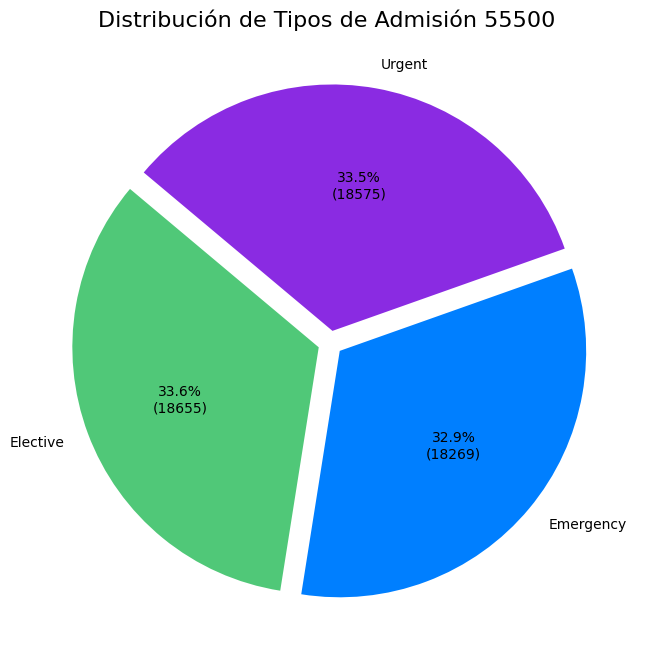

In [1123]:
# Datos, conteo de admisiones
admission_counts = {'Elective': 18655, 'Emergency': 18269, 'Urgent': 18576}
total_admissions = 55500

# Extraer los valores y etiquetas
admission_types = list(admission_counts.keys())
counts = list(admission_counts.values())
percentages = [count / total_admissions * 100 for count in counts]

# Crear gráfico de torta
plt.figure(figsize=(8, 8))
colors = ['#50C878', '#007FFF', '#8A2BE2']  # Verde esmeralda, azul y púrpura
explode = (0.05, 0.05, 0.05)  # Separar las secciones para mayor claridad

plt.pie(
    counts, 
    labels=admission_types, 
    autopct=lambda p: f'{p:.1f}%\n({int(p*total_admissions/100)})',
    startangle=140, 
    colors=colors, 
    explode=explode
)

# Título del gráfico
plt.title("Distribución de Tipos de Admisión 55500 ", fontsize=16)

# Mostrar gráfico
plt.show()

Este gráfico muestra la proporción de cada tipo de admisión (Elective, Emergency, Urgent) en el total de 55,500 registros. Los tipos de admisión están balanceados, con proporciones muy similares.

Aunque las diferencias son mínimas, el tipo Elective tiene la mayor cantidad de admisiones, seguido por Urgent y luego Emergency.

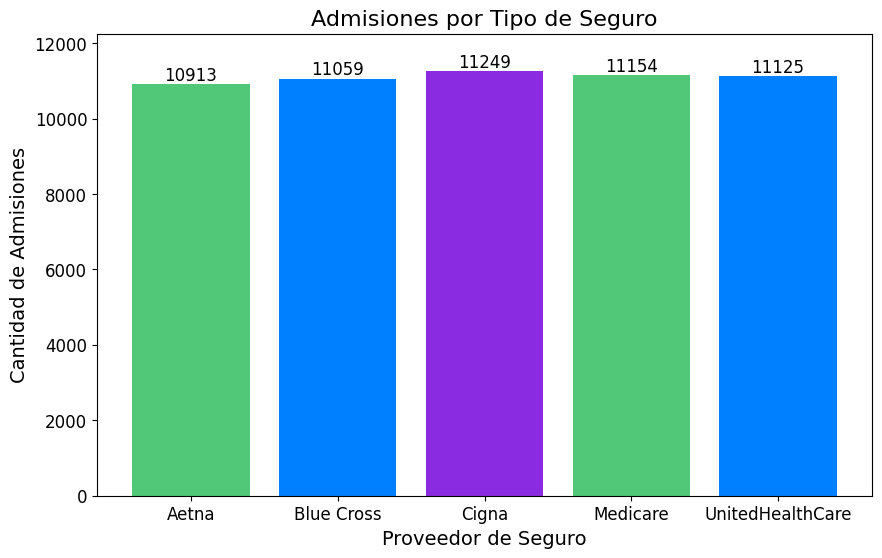

In [1124]:
# Datos
insurance_counts = {
    'Aetna': 10913,
    'Blue Cross': 11059,
    'Cigna': 11249,
    'Medicare': 11154,
    'UnitedHealthCare': 11125
}

# Extraer etiquetas y valores
insurance_providers = list(insurance_counts.keys())
counts = list(insurance_counts.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
colors = ['#50C878', '#007FFF', '#8A2BE2', '#50C878', '#007FFF']  # Colores alternados
bars = plt.bar(insurance_providers, counts, color=colors)

# Agregar las cantidades encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 100, str(yval), ha='center', fontsize=12)

# Configuración del gráfico
plt.title("Admisiones por Tipo de Seguro", fontsize=16)
plt.xlabel("Proveedor de Seguro", fontsize=14)
plt.ylabel("Cantidad de Admisiones", fontsize=14)
plt.ylim(0, max(counts) + 1000)  # Ajustar el límite superior del eje Y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

La distribución es uniforme entre los proveedores de seguro, lo que sugiere que ningún proveedor domina significativamente en el total de admisiones hospitalarias.

Este tipo de análisis es útil para entender cómo se distribuyen los pacientes en función de su proveedor de seguro, lo que puede ayudar a identificar patrones o tendencias.

In [1125]:
# Estadísticas descriptivas 
predictor_stats = df.drop(columns=['Admission Type']).describe()
print(predictor_stats)

                Age              Date of Admission  Billing Amount  \
count  54966.000000                          54966    54966.000000   
mean      51.535185  2021-11-01 17:35:29.505512448    25544.306284   
min       13.000000            2019-05-08 00:00:00    -2008.492140   
25%       35.000000            2020-07-28 00:00:00    13243.718641   
50%       52.000000            2021-11-02 00:00:00    25542.749145   
75%       68.000000            2023-02-03 00:00:00    37819.858159   
max       89.000000            2024-05-07 00:00:00    52764.276736   
std       19.605661                            NaN    14208.409711   

        Room Number                 Discharge Date  Stay Duration  \
count  54966.000000                          54966   54966.000000   
mean     301.124404  2021-11-17 05:34:28.202161408      15.499290   
min      101.000000            2019-05-09 00:00:00       1.000000   
25%      202.000000            2020-08-13 00:00:00       8.000000   
50%      302.000000     

**Interpretaciòn:**

Age

La cantidad de datos es de 55.500, la edad promedio de los pacientes es de 51.53 años.

std: la desviación estándar de las edades es de 19.60, lo que indica la dispersión de las edades alrededor del promedio.
la edad minima es de 13 años

El primer cuartil (Q1) de las edades es 35 años, lo que indica que el 25% de los pacientes tiene 35 años o menos.

La mediana de las edades es 52 años, lo que indica que la mitad de los pacientes tienen más de 52 años.

El tercer cuartil (Q3) de las edades es 68 años, lo que indica que el 75% de los pacientes tiene 68 años o menos.

La edad maxima es de 89 años.

**Billing Amount**

El monto medio facturado es de $25,539.32.

La desviación estándar de los montos facturados es de $14,211.45, indicando variabilidad en los montos facturados entre registros.

El monto facturado mínimo es -$2,008.49, lo cual es inusual y podría indicar errores o registros incorrectos en los datos.

 El primer cuartil de los montos facturados es $13,241.22.

El monto facturado máximo es $52,764.28.


**Histograma: Distribución de los Montos de Facturación (Billing Amount) segun el tipo de seguro**

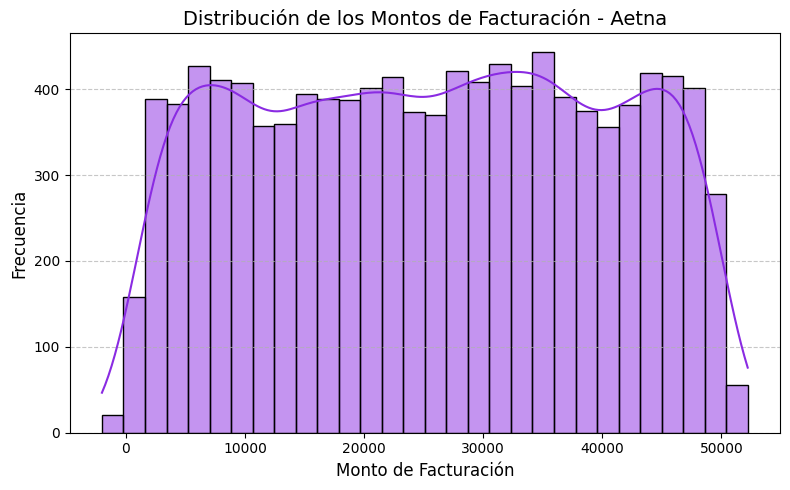

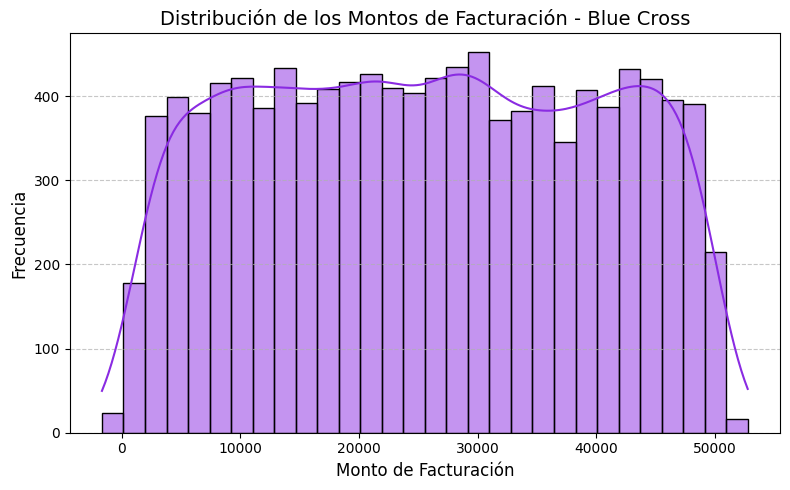

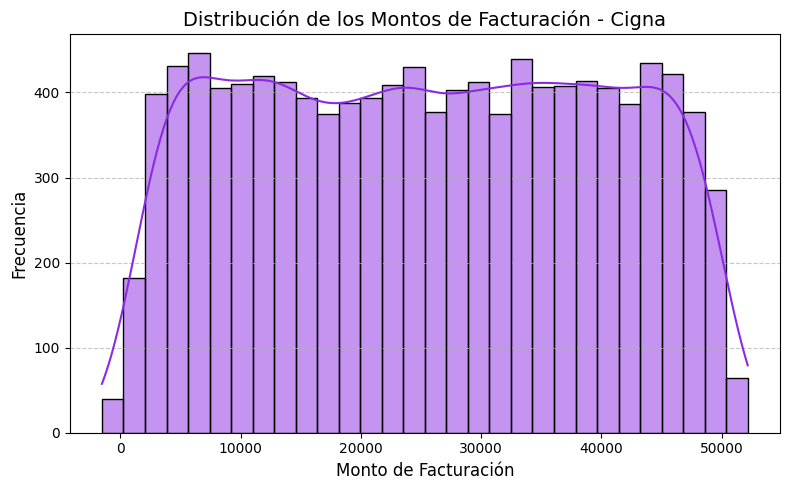

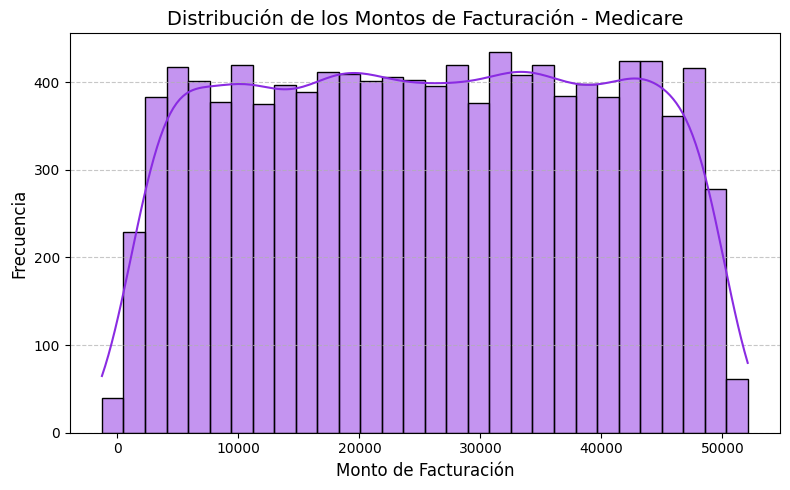

No hay datos disponibles para el proveedor: UnitedHealthCare


In [1126]:
# Lista de proveedores de seguros específicos
insurance_providers = ['Aetna', 'Blue Cross', 'Cigna', 'Medicare', 'UnitedHealthCare']

# Colores para los gráficos
colors = ['#50C878', '#8A2BE2']

# Crear un histograma separado para cada proveedor de seguros
for provider in insurance_providers:
    # Filtrar los datos para el proveedor actual
    provider_data = df[df['Insurance Provider'] == provider]
    
    # Verificar si el proveedor tiene datos
    if not provider_data.empty:
        # Crear el histograma
        plt.figure(figsize=(8, 5))
        sns.histplot(provider_data['Billing Amount'], kde=True, bins=30, color=colors[1])
        
        # Personalización del gráfico
        plt.title(f'Distribución de los Montos de Facturación - {provider}', fontsize=14)
        plt.xlabel('Monto de Facturación', fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        
        # Mostrar el gráfico
        plt.show()
    else:
        print(f"No hay datos disponibles para el proveedor: {provider}")


Este histograma muestra la frecuencia de los montos facturados por Aetna. La mayoría de las facturas se concentran entre 5,000 y 45,000 de dolares, con un pico de frecuencia alrededor de los 30,000-35,000.

**Edad por genero**

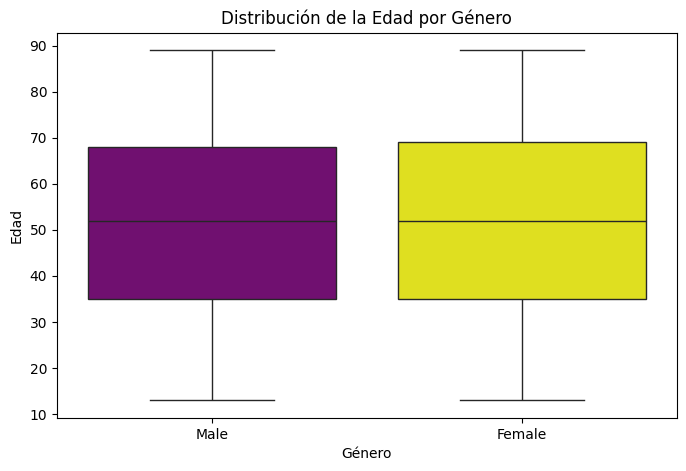

In [1127]:
# Crear Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Age', data=df, palette=['purple', 'yellow'])
plt.title('Distribución de la Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()


Este gráfico de cajas (boxplot) compara la distribución de edades entre hombres (Male) y mujeres (Female). Las medianas (líneas horizontales dentro de las cajas) son similares para ambos géneros, alrededor de los 50 años, y los rangos de edad van aproximadamente desde los 15 hasta los 90 años.

**Stay Duration vs Billing Amount (Scatterplot)**

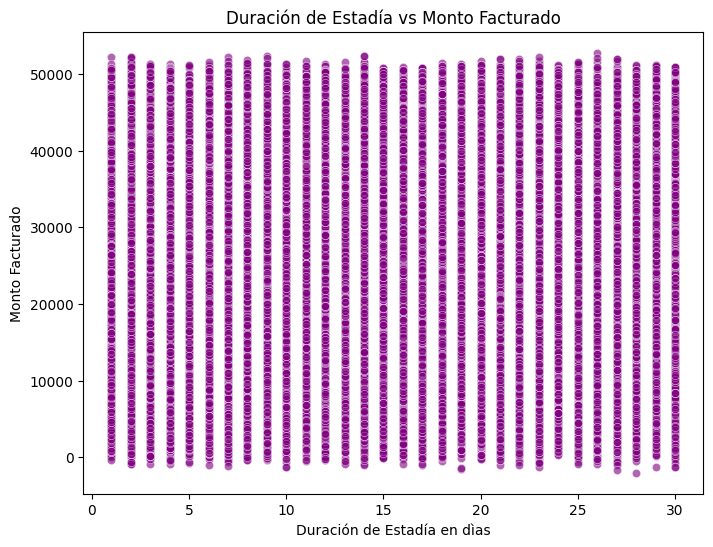

In [1128]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Stay Duration', y='Billing Amount', alpha=0.6, color='purple')
plt.title('Duración de Estadía vs Monto Facturado')
plt.xlabel('Duración de Estadía en dìas')
plt.ylabel('Monto Facturado')
plt.show()


Este gráfico de dispersión muestra la relación entre los días de estadía (eje X) y el monto facturado (eje Y). Los puntos están distribuidos verticalmente para cada día de estadía, sugiriendo que hay una gran variación en los montos facturados independientemente de la duración de la estadía.

**Stay Duration vs Insurance Provider (Boxplot)**

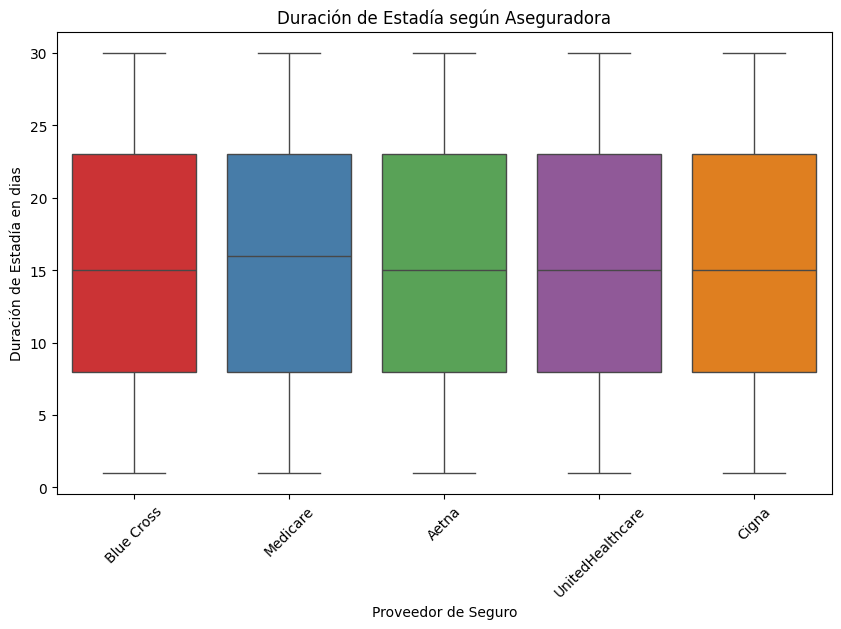

In [1129]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Insurance Provider', y='Stay Duration', palette='Set1')
plt.title('Duración de Estadía según Aseguradora')
plt.xlabel('Proveedor de Seguro')
plt.ylabel('Duración de Estadía en dias')
plt.xticks(rotation=45)
plt.show()

Este boxplot compara la duración de las estadías entre diferentes aseguradoras (Blue Cross, Medicare, Aetna, UnitedHealthcare y Cigna). Las medianas son similares entre todas las aseguradoras (aproximadamente 15 días), y los rangos típicos están entre 5 y 25 días.

**Test Results vs Medication**

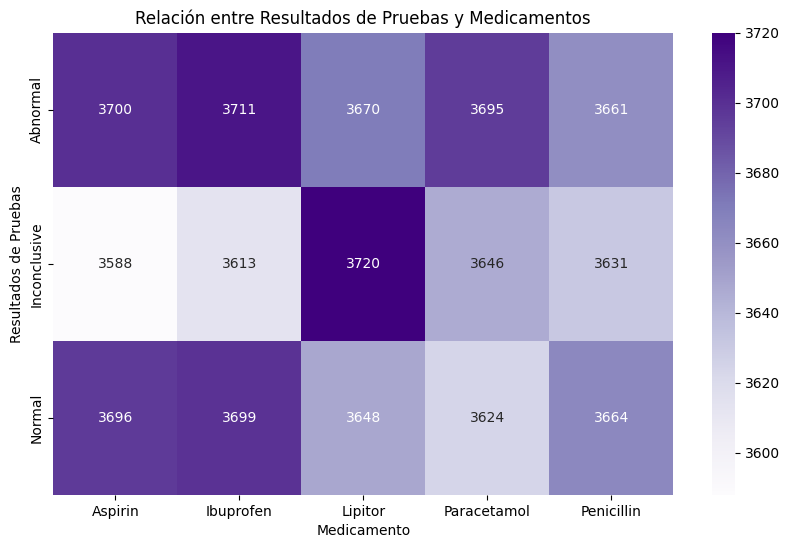

In [1130]:
test_medication = pd.crosstab(df['Test Results'], df['Medication'])
plt.figure(figsize=(10, 6))
sns.heatmap(test_medication, annot=True, fmt="d", cmap='Purples')
plt.title('Relación entre Resultados de Pruebas y Medicamentos')
plt.xlabel('Medicamento')
plt.ylabel('Resultados de Pruebas')
plt.show()

Este mapa de calor muestra la relación entre los resultados de pruebas (Normal, Inconclusive, Abnormal) y diferentes medicamentos (Aspirin, Ibuprofen, Lipitor, Paracetamol, Penicillin). Los valores en cada celda indican frecuencias o mediciones, con intensidades de color que representan valores más altos (más oscuro) o más bajos (más claro).

**Medical Condition vs Billing Amount**

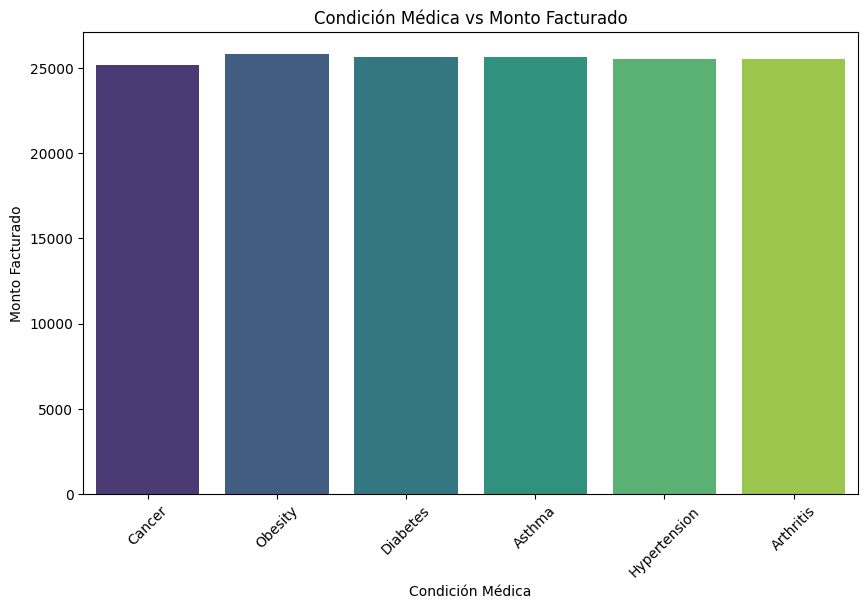

In [1131]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Medical Condition', y='Billing Amount', palette='viridis', ci=None)
plt.title('Condición Médica vs Monto Facturado')
plt.xlabel('Condición Médica')
plt.ylabel('Monto Facturado')
plt.xticks(rotation=45)
plt.show()

**Admission Type vs Billing Amount**

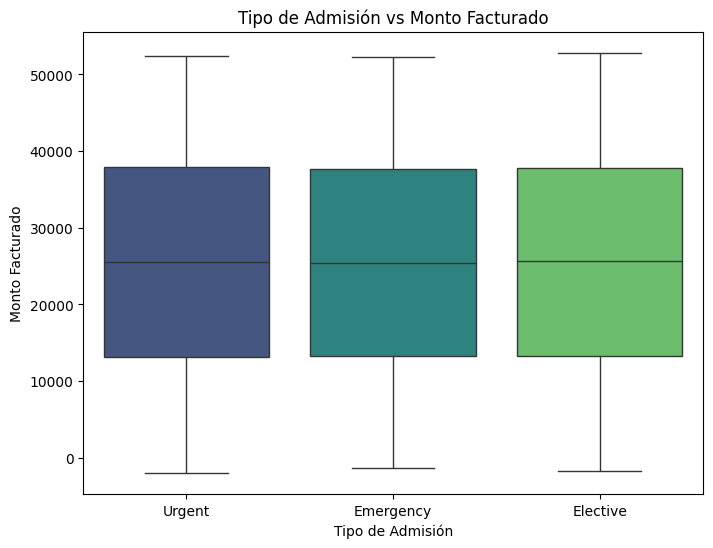

In [1132]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Admission Type', y='Billing Amount', palette='viridis')
plt.title('Tipo de Admisión vs Monto Facturado')
plt.xlabel('Tipo de Admisión')
plt.ylabel('Monto Facturado')
plt.show()

# **4.Transformaciòn de Datos para el modelo**

In [1133]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Stay Duration,Categoria Edad,Discriminated
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,Adulto,1
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,Adulto Mayor,0
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,Adulto Mayor,0
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,Adulto,0
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,Adulto,1


In [1134]:
categorical_cols = ['Gender','Blood Type', 'Insurance Provider', 'Medication', 'Test Results', 'Medical Condition','Categoria Edad','Admission Type'] 
continues_cols = ['Discharge Date', 'Date of Admission']
num_cols = ['Room Number', 'Age', 'Billing Amount' ]

In [1135]:
#codificaciòn de variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [1136]:
#se codifican las columnas doctor y hospital como codigos pero añadiendolas al dataframe como columnas nuevas
df['Doctor Code'] = le.fit_transform(df['Doctor'])
df['Hospital Code'] = le.fit_transform(df['Hospital'])

In [1137]:
df['Billing Amount'] = df['Billing Amount'].abs()  # Asegurarse de que todos los montos sean positivos
# Corregir y asegurar que Billing Amount es float
df['Billing Amount'] = pd.to_numeric(df['Billing Amount'], errors='coerce')

**se transforman las variables donde:**

Gender corresponde a 'Male' es '1' y 'Female' es '0'

Blood Type corresponde a  'A+' es 0 , 'A-' es 1,  'AB+' es 2, 'AB-' es 3 , 'B+'es 4,'B-' es 5 , 'O+' es 6, 'O-' es 7.

Insurance Provider corresponde a 'Aetna' a 0, 'Blue Cross' a 1, 'Cigna' a 2, 'Medicare' a 3, , 'UnitedHealthcare' a 4.

Medication corresponde a 'Aspirin' a 0,'Ibuprofen'a 1, 'Lipitor' a 2, 'Paracetamol' a 3, 'Penicillin' a 4.

Test Results corresponde a 'Abnormal' a 0,'Inconclusive '1,'Normal' a 2.

Medical Condition corresponde a 'Arthritis'a 0, 'Asthma'a 1 , 'Cancer' a 2 ,'Diabetes a 3,  'Hypertension'a 4, 'Obesity' a 5.


Stay Duration se refiere a la cantidad de tiempo en dias que estuvo el paciente en el hospital.

Doctor y Hospital se codificaron pero se dejaron como columnas nuevas llamandose Doctor Code y Hospital Code respectivamente.

Adulto que comprende la edad de(21-60) es 0

Adulto Mayor que comprende la edad de  (60+) 1

Joven que comprende la edad de (0-20) es 2

Triage corresponde  a Alta: 0, Baja: 1, Media: 2

In [1138]:
#Score de complejidad
df['test_norm'] = (df['Test Results'] - df['Test Results'].min()) / \
                 (df['Test Results'].max() - df['Test Results'].min())
df['med_norm'] = (df['Medication'] - df['Medication'].min()) / \
                (df['Medication'].max() - df['Medication'].min())

df['score_Triage'] = (df['test_norm'] * 0.6 + df['med_norm'] * 0.4)
df['Triage'] = pd.qcut(df['score_Triage'], 
                                 q=3, 
                                 labels=['Baja', 'Media', 'Alta'])

In [1139]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Test Results,Stay Duration,Categoria Edad,Discriminated,Doctor Code,Hospital Code,test_norm,med_norm,score_Triage,Triage
0,Bobby Jackson,30,1,5,2,2024-01-31,Matthew Smith,Sons and Miller,1,18856.281306,...,2,2,0,1,26320,29933,1.0,0.75,0.9,Alta
1,Leslie Terry,62,1,0,5,2019-08-20,Samantha Davies,Kim Inc,3,33643.327287,...,1,6,1,0,33355,16012,0.5,0.25,0.4,Media
2,Danny Smith,76,0,1,5,2022-09-22,Tiffany Mitchell,Cook PLC,0,27955.096079,...,2,15,1,0,37534,5473,1.0,0.00,0.6,Media
3,Andrew Watts,28,0,6,3,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",3,37909.782410,...,0,30,0,0,22226,12317,0.0,0.25,0.1,Baja
4,Adrienne Bell,43,0,2,2,2022-09-19,Kathleen Hanna,White-White,0,14238.317814,...,0,20,0,1,20973,33598,0.0,1.00,0.4,Media


In [1146]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Name','Gender','Age','Date of Admission','Doctor','Hospital',
'Discharge Date']

df_new = df.drop(columns=columnas_a_eliminar)




In [1147]:
df_new['Triage'] = le.fit_transform(df_new['Triage'])

In [1148]:
df_new.head()

,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Stay Duration,Categoria Edad,Discriminated,Doctor Code,Hospital Code,test_norm,med_norm,score_Triage,Triage
0,5,2,1,18856.281306,328,2,3,2,2,0,1,26320,29933,1.0,0.75,0.9,0
1,0,5,3,33643.327287,265,1,1,1,6,1,0,33355,16012,0.5,0.25,0.4,2
2,1,5,0,27955.096079,205,1,0,2,15,1,0,37534,5473,1.0,0.00,0.6,2
3,6,3,3,37909.782410,450,0,1,0,30,0,0,22226,12317,0.0,0.25,0.1,1
4,2,2,0,14238.317814,458,2,4,0,20,0,1,20973,33598,0.0,1.00,0.4,2


**Boxplot: Estadísticas de Edad por Género**

**Gráfico de dispersión: Relación entre Edad y Monto de Facturación**

**Heatmap: Correlación entre Variables Numéricas**

In [1149]:
# Guardar el nuevo dataframe
#df_new.to_csv('file/healthcare_dataset_limpio.csv', index=False)

In [1150]:
df_new.head()

,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Stay Duration,Categoria Edad,Discriminated,Doctor Code,Hospital Code,test_norm,med_norm,score_Triage,Triage
0,5,2,1,18856.281306,328,2,3,2,2,0,1,26320,29933,1.0,0.75,0.9,0
1,0,5,3,33643.327287,265,1,1,1,6,1,0,33355,16012,0.5,0.25,0.4,2
2,1,5,0,27955.096079,205,1,0,2,15,1,0,37534,5473,1.0,0.00,0.6,2
3,6,3,3,37909.782410,450,0,1,0,30,0,0,22226,12317,0.0,0.25,0.1,1
4,2,2,0,14238.317814,458,2,4,0,20,0,1,20973,33598,0.0,1.00,0.4,2


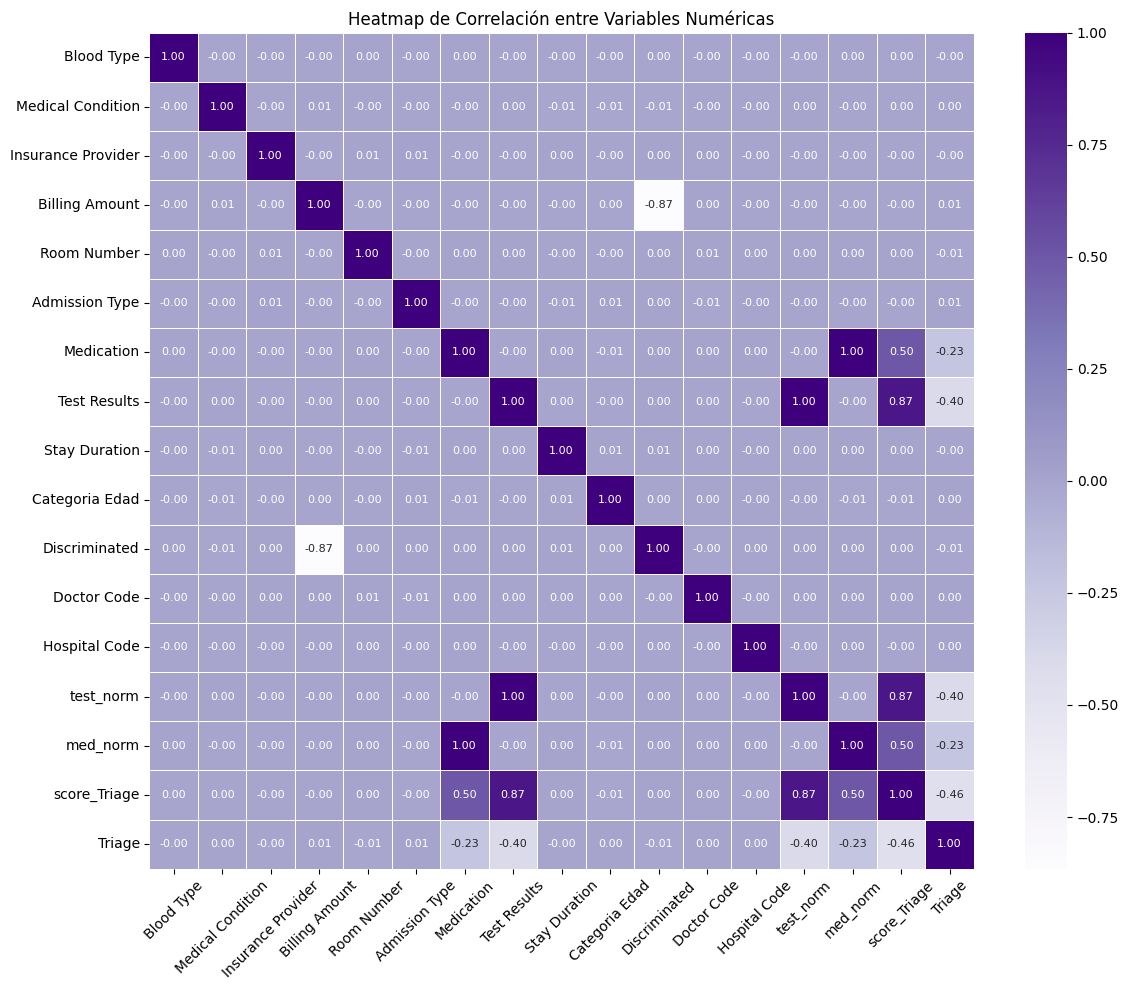

In [1152]:
# Seleccionar solo las columnas numéricas

numeric_columns = ['Blood Type', 'Medical Condition', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Medication',
       'Test Results', 'Stay Duration', 'Categoria Edad', 'Discriminated',
       'Doctor Code', 'Hospital Code', 'test_norm', 'med_norm', 'score_Triage',
       'Triage']  
                   # Solo columnas numéricas relevantes
numeric_df = df_new[numeric_columns]

# Calcular la matriz de correlación
correlation = numeric_df.corr()

# Crear heatmap
plt.figure(figsize=(12, 10))  # Aumenta el tamaño de la figura
sns.heatmap(correlation, annot=True, cmap='Purples', linewidths=0.5, 
            fmt=".2f", annot_kws={"size": 8})  # Reducción del tamaño de fuente
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.yticks(rotation=0)   # Etiquetas del eje y sin rotar
plt.title('Heatmap de Correlación entre Variables Numéricas')
plt.tight_layout()  # Ajustar layout para evitar recortes
plt.show()


In [1153]:
correlation_matrix = df_new.corr()

# Para ver los valores 
print(correlation_matrix)

                    Blood Type  Medical Condition  Insurance Provider  \
Blood Type            1.000000          -0.004183           -0.001097   
Medical Condition    -0.004183           1.000000           -0.004689   
Insurance Provider   -0.001097          -0.004689            1.000000   
Billing Amount       -0.000570           0.005439           -0.002491   
Room Number           0.004465          -0.004286            0.008992   
Admission Type       -0.004305          -0.001848            0.009856   
Medication            0.002778          -0.003091           -0.002483   
Test Results         -0.000717           0.002538           -0.001863   
Stay Duration        -0.001702          -0.006042            0.001736   
Categoria Edad       -0.004170          -0.006845           -0.000608   
Discriminated         0.000930          -0.006113            0.004012   
Doctor Code          -0.004956          -0.002408            0.002324   
Hospital Code        -0.000457          -0.002048  